In [5]:
import pandas as pd
import glob
import numpy as np
import shutil
import os
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

In [4]:
dest_dir="../../00_Data/01_Transformed_Data/Face_Detection_Images"
for filename in glob.glob("../../00_Data/00_Source_Data/*"):
    files = os.listdir(filename)
    for fname in files:
        shutil.copy2(os.path.join(filename,fname), dest_dir)
        

In [6]:
# Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [7]:
#Resize Image
a=set()
for image in  glob.glob("../../00_Data/01_Transformed_Data/Face_Detection_Images/*"):
    img = cv2.imread(image)
    a.add(img.shape)
print(a)

{(250, 250, 3)}


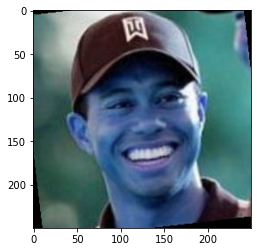

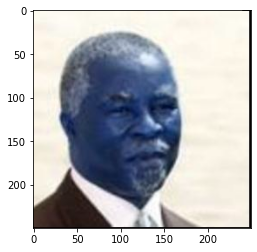

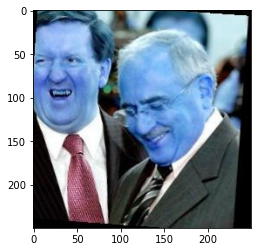

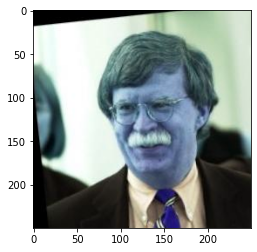

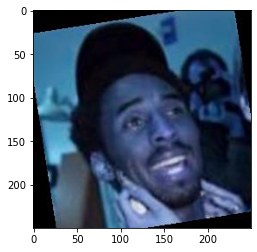

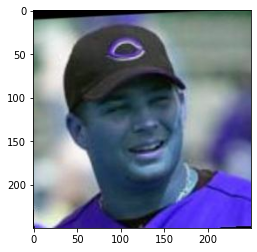

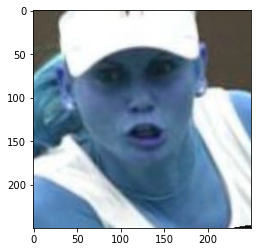

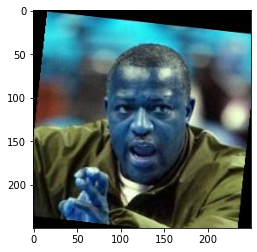

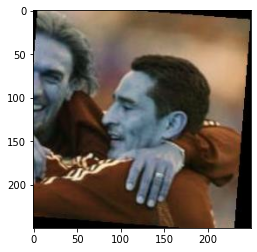

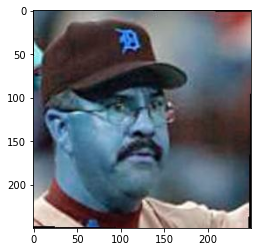

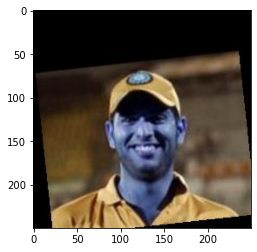

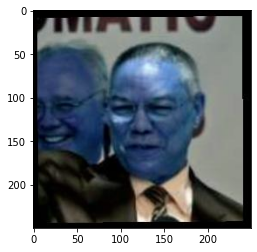

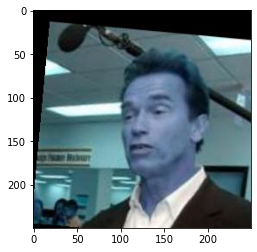

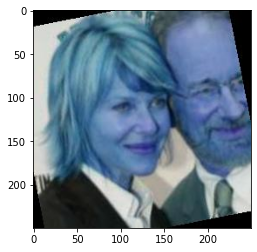

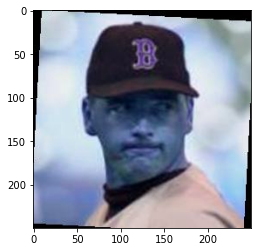

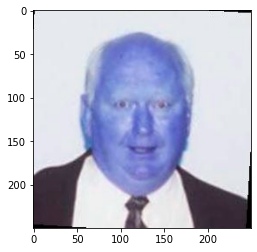

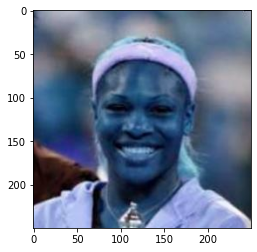

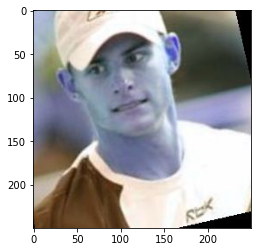

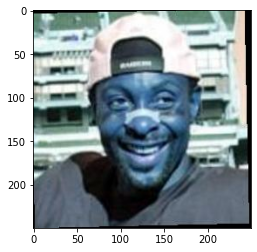

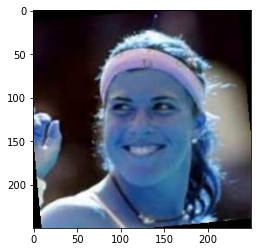

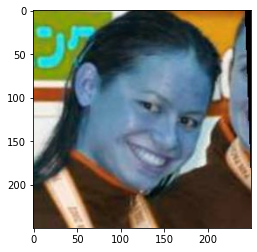

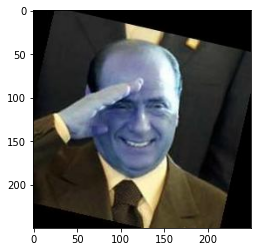

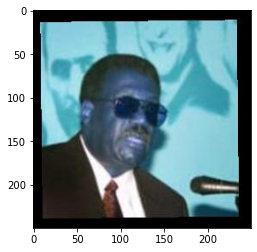

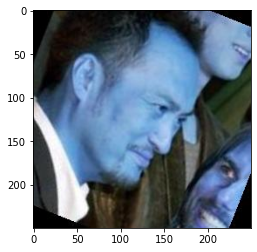

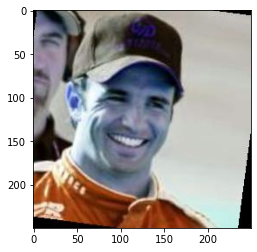

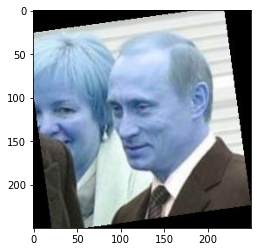

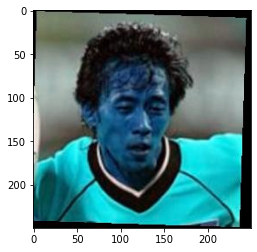

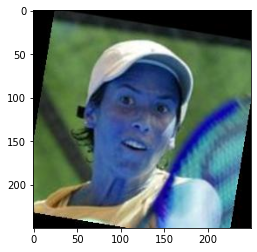

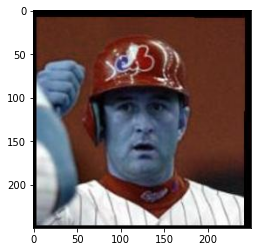

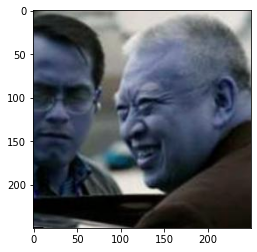

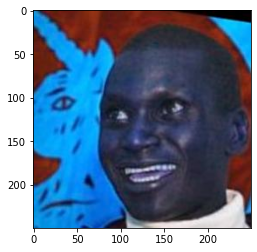

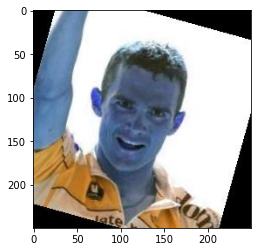

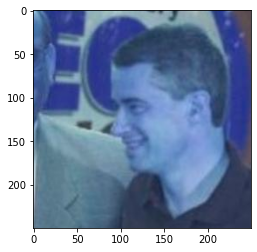

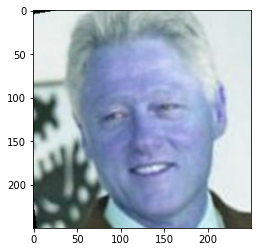

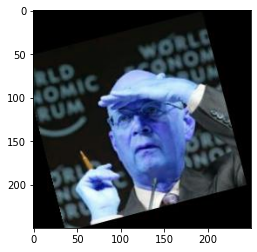

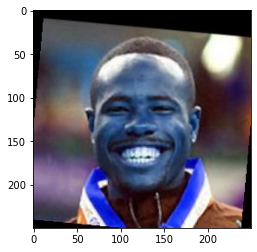

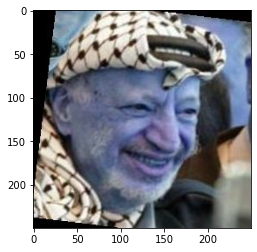

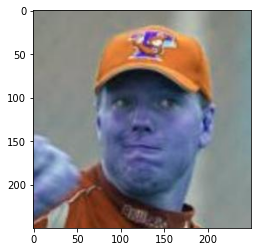

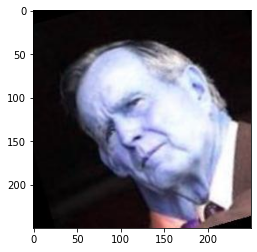

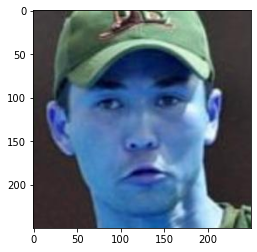

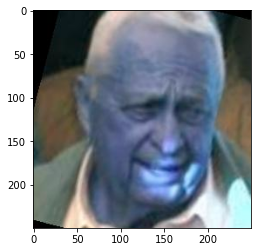

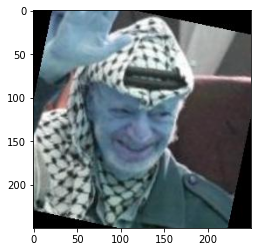

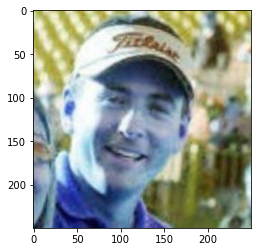

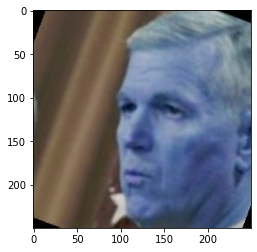

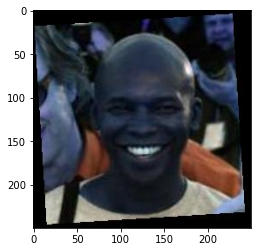

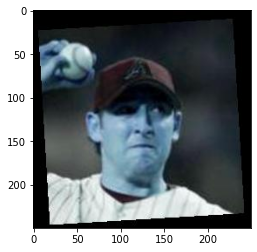

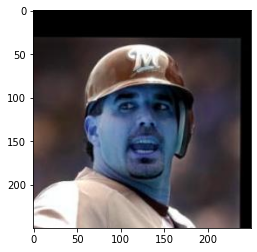

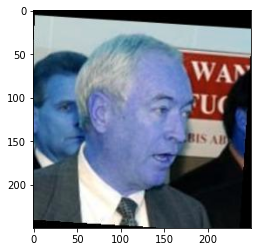

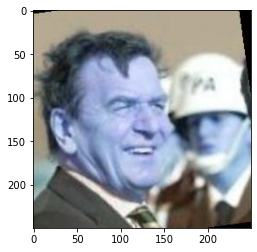

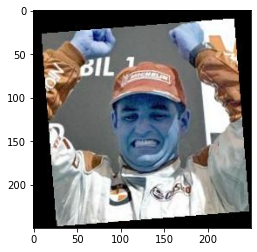

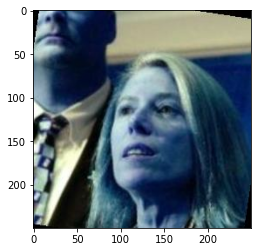

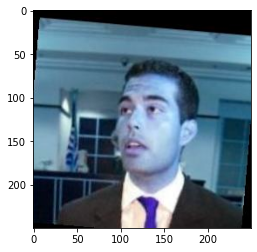

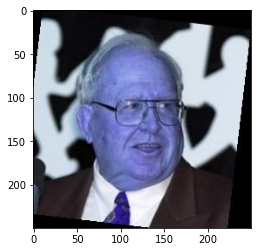

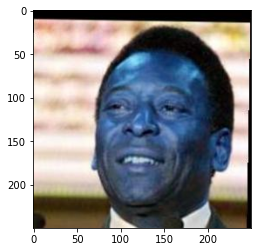

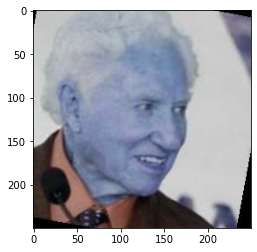

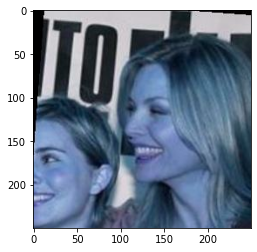

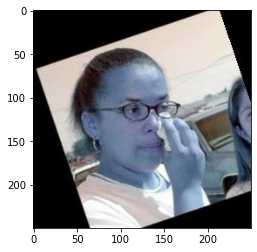

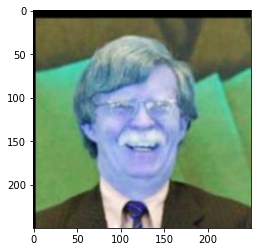

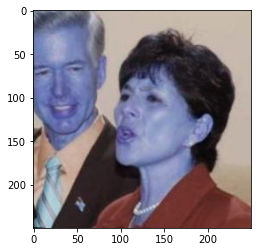

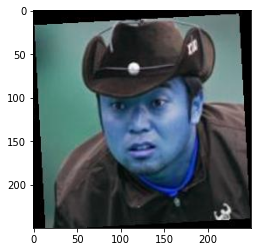

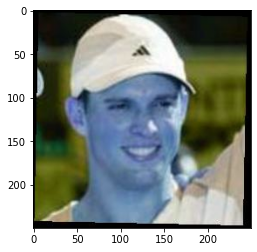

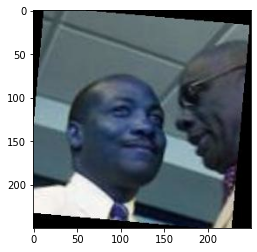

                                            Filename  xmin  ymin  xmax  ymax
0  ../../00_Data/01_Transformed_Data/Face_Detecti...    71    69   180   178
1  ../../00_Data/01_Transformed_Data/Face_Detecti...    72    71   176   175
2  ../../00_Data/01_Transformed_Data/Face_Detecti...    60    66   183   189
3  ../../00_Data/01_Transformed_Data/Face_Detecti...    66    67   183   184
4  ../../00_Data/01_Transformed_Data/Face_Detecti...    64    64   186   186


In [8]:
import glob


#data=pd.DataFrame(columns=['Filename','x','y','w','h'])
final_lst=[]
for image in  glob.glob("../../00_Data/01_Transformed_Data/Face_Detection_Images/*"):
    img = cv2.imread(image)
    #cv2.imshow('img',img)
    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #cv2.imshow(gray)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    #Storing in the Dataframe
    try:
        lst=[image,faces[0][0],faces[0][1],faces[0][0]+faces[0][2],faces[0][1]+faces[0][3]]
        final_lst.append(lst)

    except:
        for (x, y, w, h) in faces:
        #startpoint, endpoint, color, thickness
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

        #plt.imshow(img)
        #plt.show()

data=pd.DataFrame(final_lst, columns=['Filename','xmin','ymin','xmax','ymax'])
#print(data.head())




In [11]:
# ../../00_Data/01_Transformed_Data/Face_Detection_Images/*
data['label']=1
_=data.to_csv("../../00_Data/01_Transformed_Data/face_detection_data.csv", index=False)